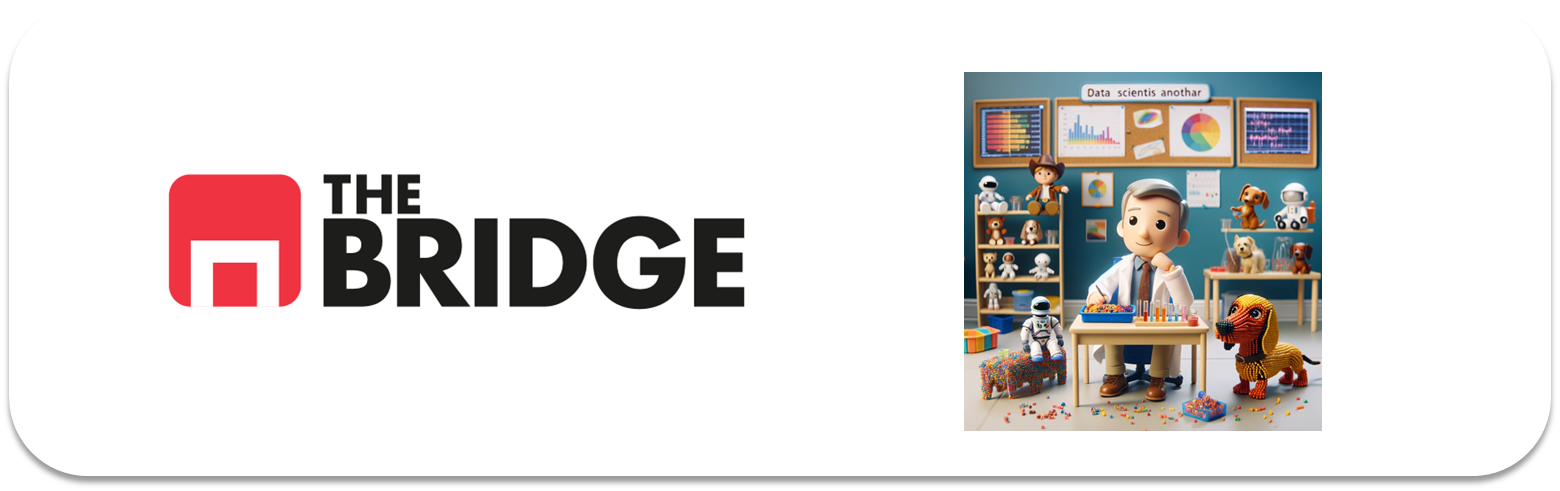

## Análisis de Datos: Distribución de valores en variables numéricas

Nos quedamos en la sesión anterior en que era necesario poder "ver" cómo era esa dispersión de algunas de las variables importantes (y no tan directoras) de nuestro dataset. Para ello vamos a emplear los histogramas y (ahora en mucha menor medida) las funciones de densidad de probabilidad.

Pero antes ejecuta las siguientes celdas, en las que además de cargar los datos tienes una serie de funciones que te vendrán bien para hacer tus análisis [y que veremos como se construyen en el sprint siguiente cuando hablemos de visualización]:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [2]:

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [3]:


def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()




### Distribución de valores: Histogramas
Los histogramas son la mejor herramienta para ver la forma, dispersión y tendencia central de los datos. Nos dan la frecuencia de aparición de cada valor de los datos. Ya los hemos empleado y comentado, pero hagámoslo otra vez:



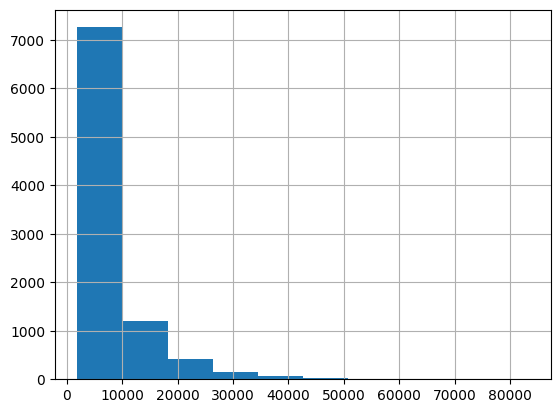

In [4]:
df_seguros["customer_lifetime_value"].hist();

Claramente existe una dispersión, pero fijate en otro dato que nos da el histograma, importante, **la distribución** de los valores, se concentran mucho en un rango inicial, y rápidamente decae la concentración y tenemos eso sí valores muy alejados que también se pierden por la escala (pero si recuerdas el boxplot de esta vairable, recordaras que había muchos valores extremos):

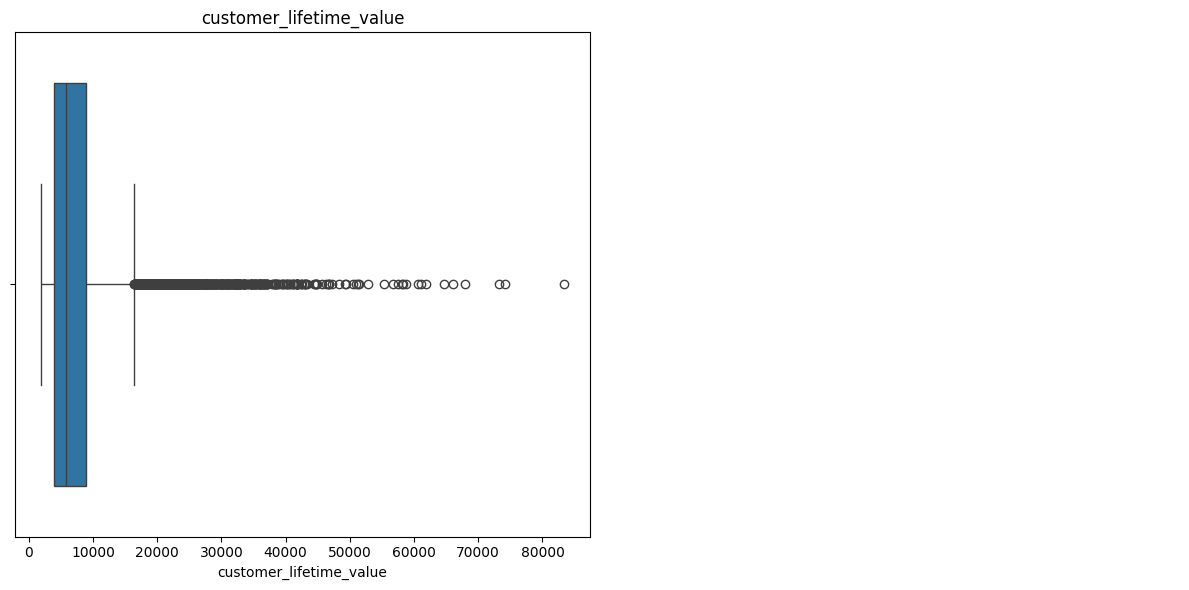

In [5]:
plot_multiple_boxplots(df_seguros, ["customer_lifetime_value"])

¿Y qué podemos hacer?
1. Analizar la variable filtrando los valores extremos.
2. En cualquier caso, parece interesante crearse una nueva variable categórica ordinal (con el *binning* que vimos en su momento) y emplearla para hacer una análisis más detallado por CLV (recuerda que es nuestra variable directora)
[Y me sigo apuntando estas cosas para mi continuación de EDA]

Este mismo análisis lo haría para todas las variables, pintar su histograma y ver si merece la pena hacer análisis por cortes filtrando los valores extremos o no (aunque esto lo haré después de analizar dichos valores)



Aunque más por su aportación futura que actual, vamos a introducir en la parte gráfica del análisis la función densidad de probabilidad

### Distribución de valores: Función densidad de probabilidad
Nos sirve para ver la forma que tiene una variable, así como la probabilidad de aparición de cada uno de sus valores. Este tipo de gráficos se utiliza para variables contínuas. Las vamos presentando porque: 

* Hay determinadas "formas" de esa función que cuando los datos las siguen podemos aplicar ciertas propiedas a los mismos (en especial con la distribucón normal, que veremos en la unidad siguiente)

* las emplearemos bastante más adelante ya que según la forma de esa función, podremos hacer transformaciones o tendremos que hacerlas para el modelado en sprints posteriores.

Vamos a mostar la función de densidad (estimada) para `customer_lifetime_value` (junto con su histograma, con mayor resolución):

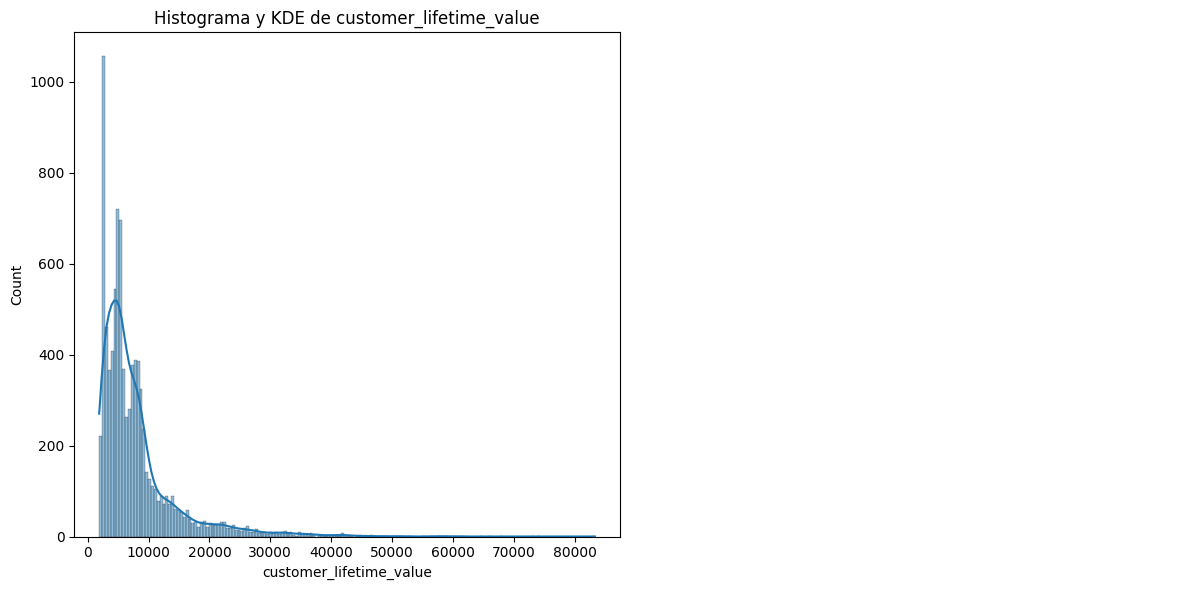

In [6]:
plot_histo_den(df_seguros,["customer_lifetime_value"])

Ahora con ese nivel no sólo queda más claro que existen posibles grupos sino que tenemos alguno especialmente significativo por la parte baja, no sólo todos esos valores en la "larga cola". 

Este gráfico además me sirve para combinar el análisis por histograma para saber a que tipo de función de densidad se podrían aproximar los datos de nuestra variable si fueran una serie estadística. Y de ahí aprovecharme de las propiedades de cada una (pero se escapa del ámbito del bootcamp). Lo que haríamos es comparar la forma a "ojo" (aunque existen mecanismos más rigurosos) y decidir si se parece a alguna de las siguietnes (sobre todo a la normal, que es la que también se llama gaussiana o campana de gauss):

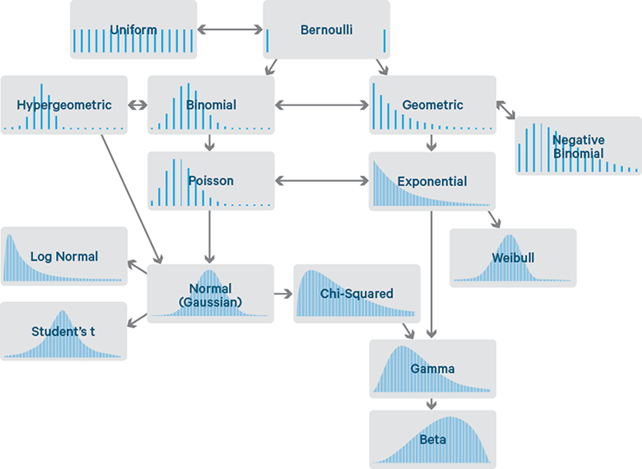

Al final te dejo un pequeño anexo sobre histogramas y distribuciones por si quieres saber más.

Para nosotros la aproximación de la distribución cobrará importancia más adelante, pero ya es bueno que nos la llevemos puesta en nuestros análisis. 

De hecho ahora vamos a aplicar el análisis de histograma-densidad a nuestros casos de uso:

#### Caso 1. Seguros: Histogramas y densidades

Como hemos comentado este análisis nos servirá para decidir como tratar determinadas variables numéricas (segmentándolas o creando categorías) o incluso para mostrar alguna conclusión sobre ellas (por ejemplo sobre las vairables directoras)

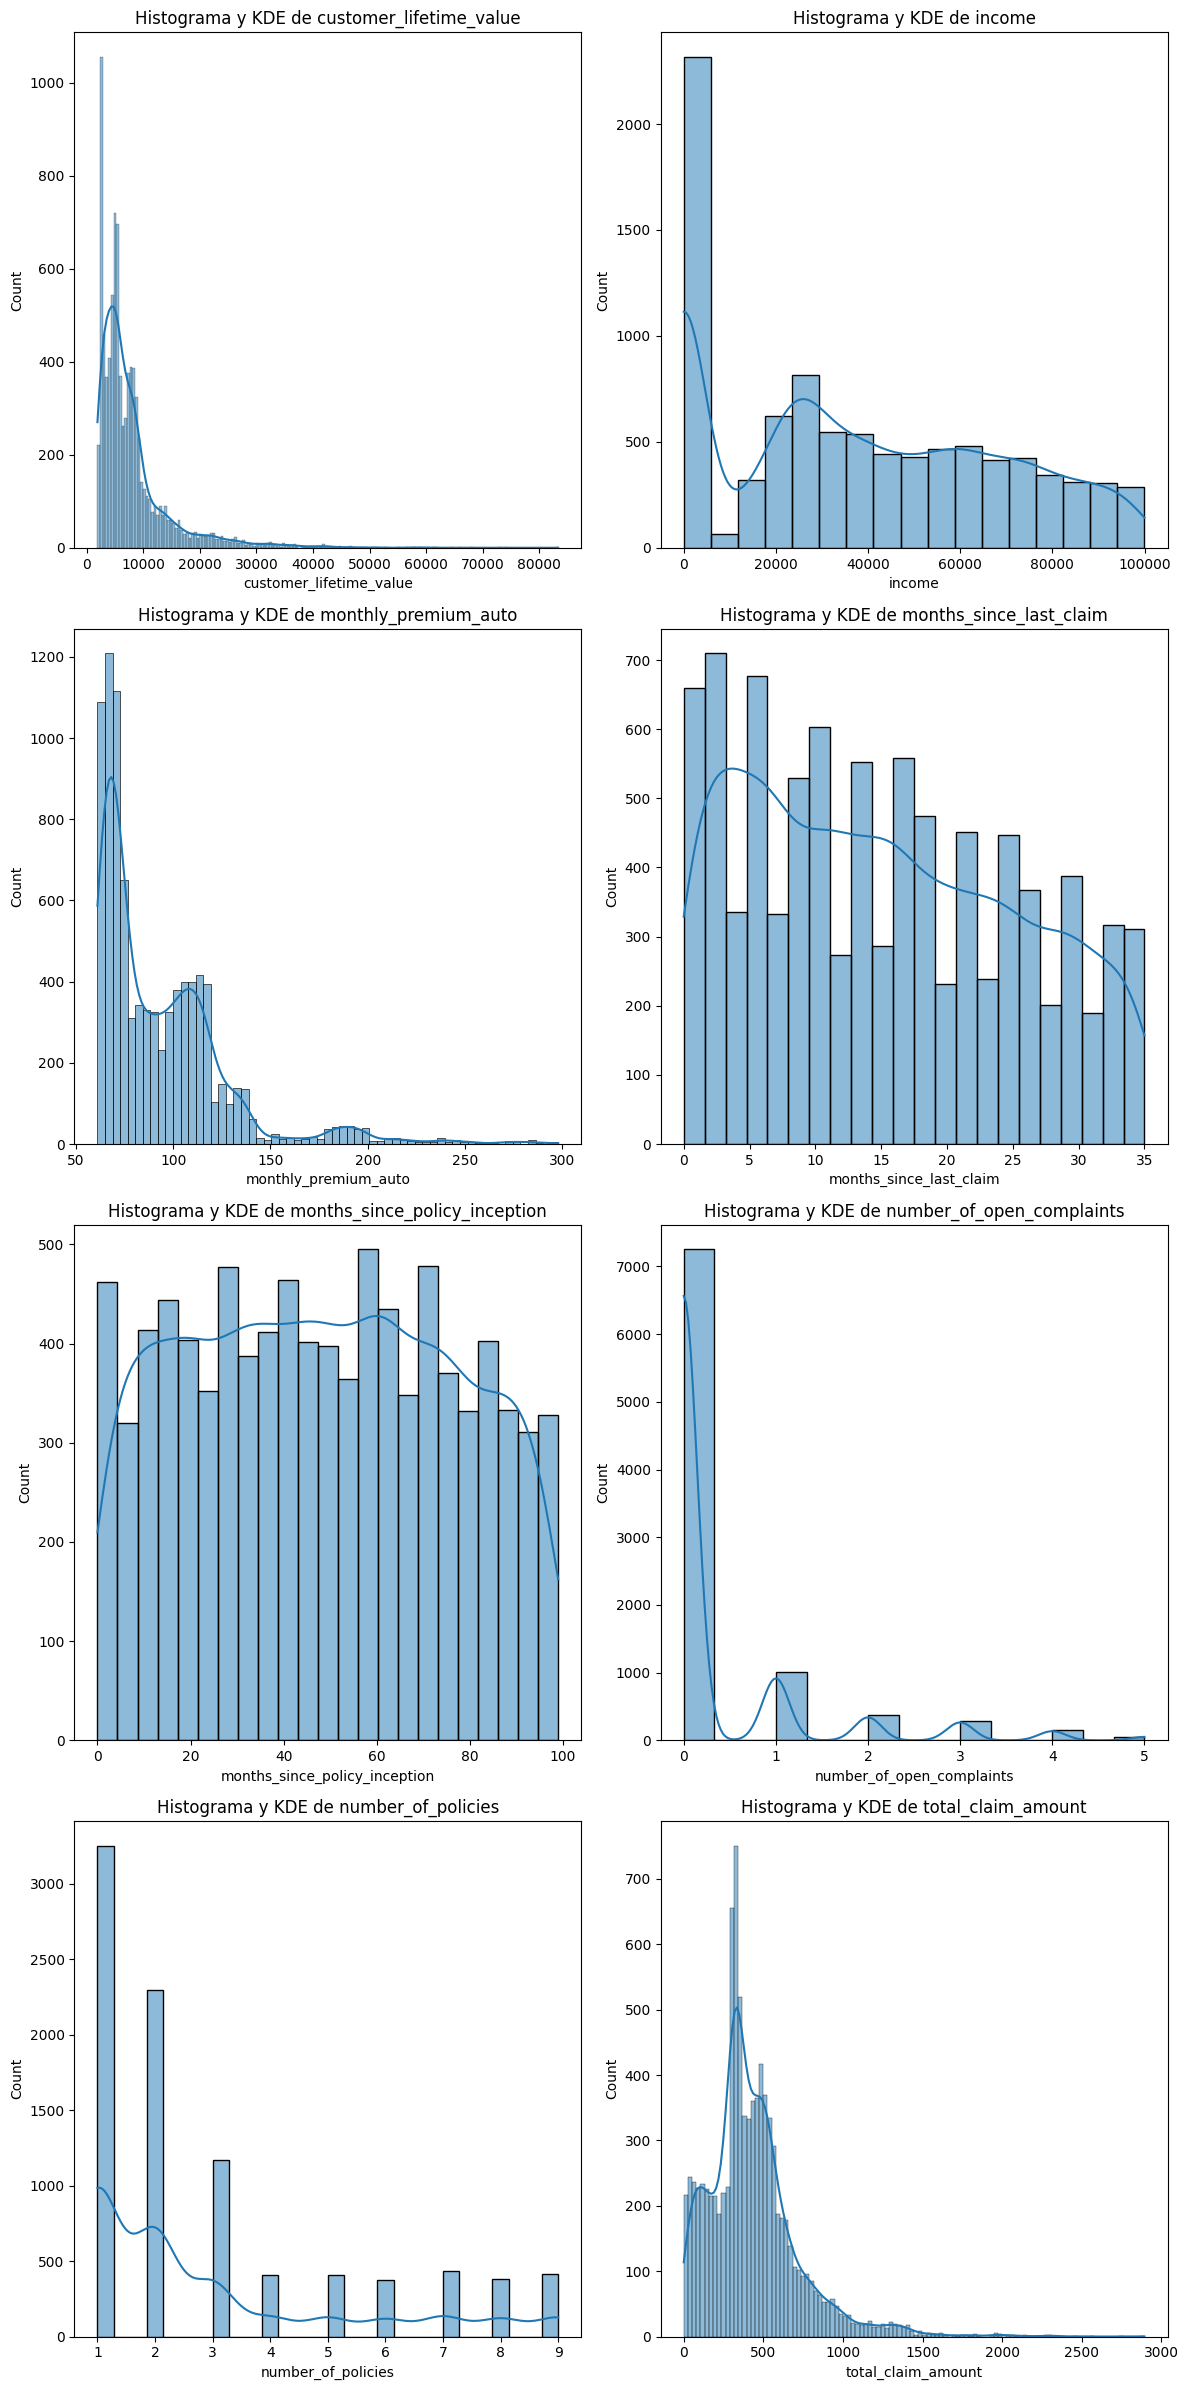

In [7]:
columnas_numericas = df_seguros.describe().columns.to_list()

plot_histo_den(df_seguros,columnas_numericas)

Una particularización que debemos tener en cuenta es que la función de distribución aplica a variables numéricas continuas, no debemos considerarlo en `number_of_policies` ni en `number_of_open_complaints`, ni las asociadas a meses.

Y ahora centrándonos en la variable directora (numérica), el customer_lifetime_value:
* Como ya habíamos visto tenemos que ver qué hacer con los valores extremos. En paralelo, yo vería que pinta tiene la distribución filtrando esos valores extremos. Y además ya miraría que valores son esos que tienen un claro pico en el histograma y lo tendría como un punto especial sobre el que llamar la atención o sobre el que informarme más (al igual que con el 14-86 de respuestas).  
* También haría una segmentación de clientes por nivel de income (donde hay una separación clara entre dos grandes grupos que analizaría por separado a la hora de compararlo con otras variables, en concreto con CLV y con respuestas) 
* Me apuntaría por si hay tiempo la posibilidad de abrir también un análisis por 3 grupos en función de la cantidad reclamada.
* Las curvas de CLV e Income tienen un cierto parecido que invita a estudiar su correlación (que por otro lado parece algo con cierto sentido, pero no necesariamente tiene que tenerlo)



#### Caso 2. Viajes: Histogramas y Densidad

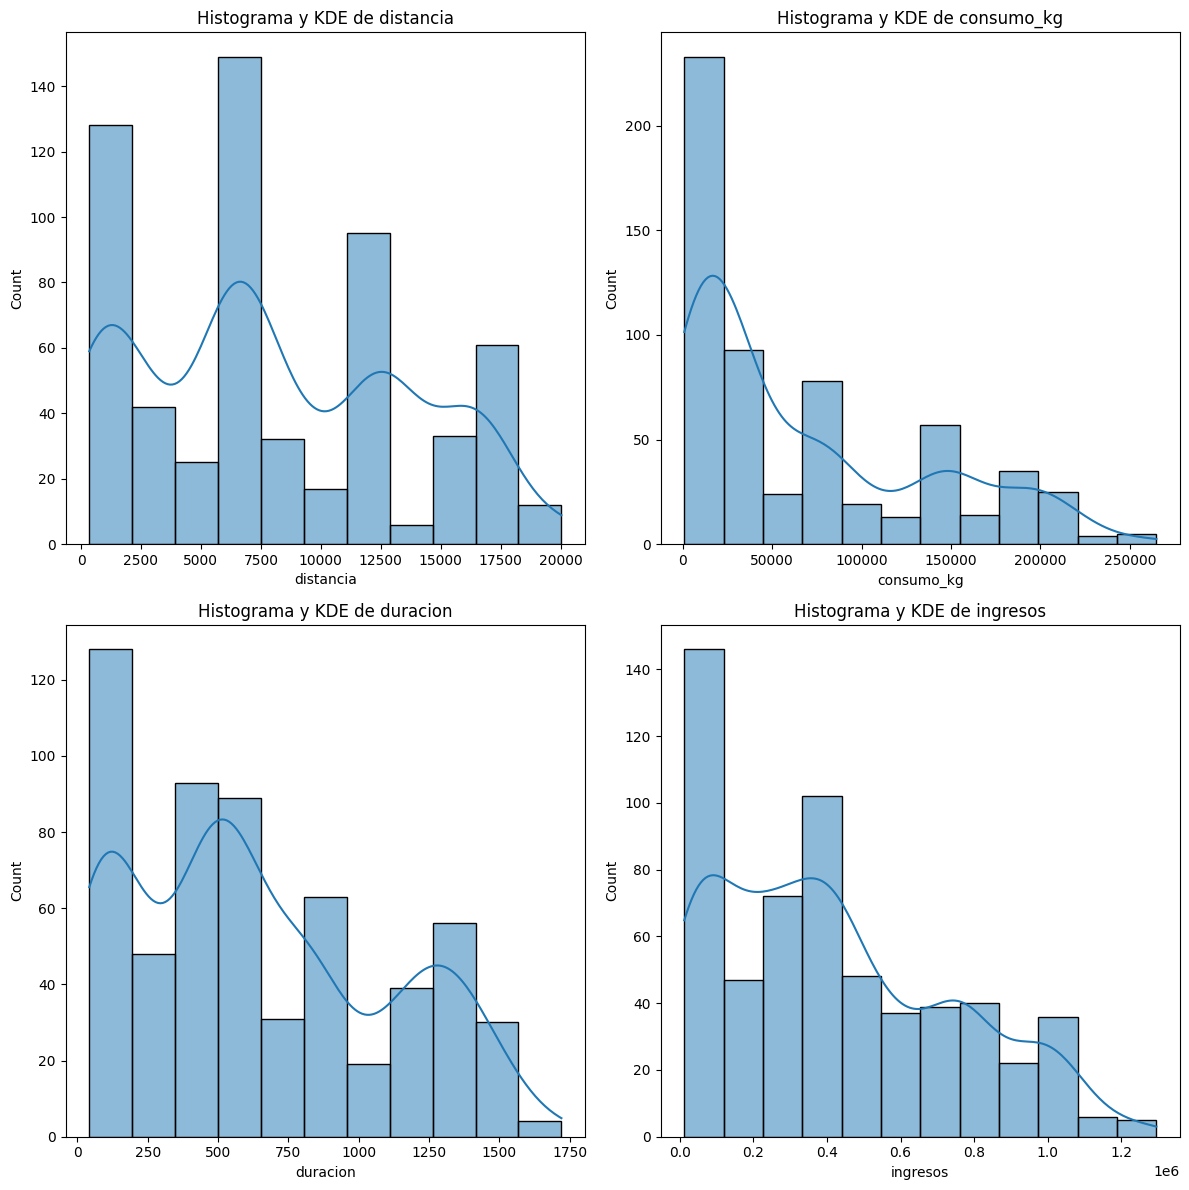

In [8]:
columnas_numericas = df_air_jun.describe().columns.to_list()

plot_histo_den(df_air_jun,columnas_numericas)

En este caso, para mí no se ve tan claro una posible segmentación (centrándome en las que marcamos como importantes a priori: ingresos y consumo, no veo claramente esa separacion y en esos casos prefiero dejarlas tal cual). Lo que si observo:
* Distancia podría segmentarla como ya hicimos en su momento y ver vuelos "internacionales","regionales","locales" o algo así. O incluso un cuarto nivel (fijate que son como cuatro "normales")
* Me interesa comparar en una parte de los ingresos con los consumos, porque parecen gráficas con valores que se distribuye similar pero hay una franja central "curiosa".

[Y eso es todo casi hemos terminado, nos queda ver la parte de las anomalías y hacer un pequeño resumen de lo que hemos visto para rematar la unidad, venga nos vemos]

## Anexo: Histogramas y Distribuciones

Muchas veces los indicadores de la *[estadística descriptiva](https://es.wikipedia.org/wiki/Estad%C3%ADstica_descriptiva)* no nos proporcionan una imagen clara de nuestros *[datos](https://es.wikipedia.org/wiki/Dato)*.  Por esta razón, siempre es útil complementarlos con gráficos de las distribuciones de los *[datos](https://es.wikipedia.org/wiki/Dato)*, que describan con qué frecuencia aparece cada valor. La representación más común de una distribución es un [histograma](https://es.wikipedia.org/wiki/Histograma), que es un gráfico que muestra la frecuencia o probabilidad de cada valor. El [histograma](https://es.wikipedia.org/wiki/Histograma) muestra las frecuencias como un gráfico de barras que indica cuan frecuente un determinado valor ocurre en el [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos). El eje horizontal representa los valores del [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos) y el eje vertical representa la frecuencia con que esos valores ocurren.

Las distribuciones se pueden clasificar en dos grandes grupos:

1. Las **[distribuciones continuas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad_continua)**, que son aquellas que presentan un número infinito de posibles soluciones. Dentro de este grupo vamos a encontrar a las distribuciones: 
    * [normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal),
    * [gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma),
    * [chi cuadrado](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2), 
    * [t de Student](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student), 
    * [pareto](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto),
    * entre otras

2. Las **distribuciones discretas**, que son aquellas en las que la variable puede pude tomar un número determinado de valores. Los principales exponenetes de este grupo son las distribuciones: 
    * [poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson),
    * [binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial),
    * [hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica),
    * [bernoulli](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli)
    * entre otras


1. https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32

2. https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm